Dropdown(description='Select', options=(' ', 'GAN-Augmented', 'VAE-Augmented', 'Oversampled-Augmented', 'Gauss…

Dropdown(description='Remove', options=(' ', 'Empirical'), value=' ')

ToggleButton(value=False, description='Centered')

Selected methods: Empirical


TypeError: loadAndPlot() got an unexpected keyword argument 'selected_offset'

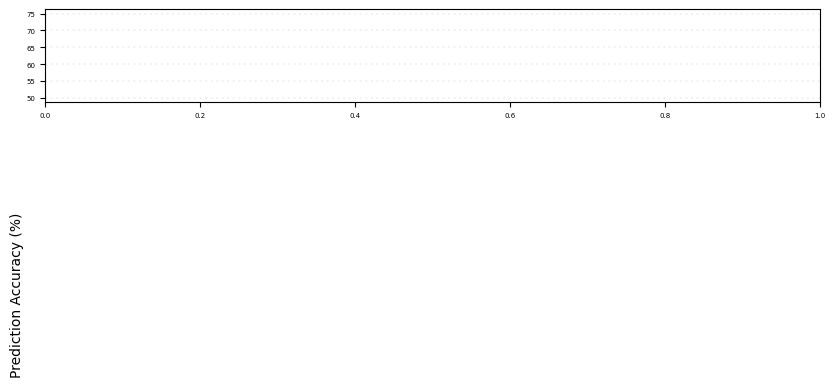

In [ ]:
###############################################
## IMPORT MODULES                            ##
###############################################
from classification_plot_functions import *
import ipywidgets as wd
from IPython.display import clear_output

class InteractivePlot:

    def __init__(self):

        self.selected_targets = []
        self.available_targets, _ = retrieveData(0, 1)

        self.select_target_dropdown = wd.Dropdown(options=[' ']+self.available_targets, value = ' ', description = 'Select', disabled = False)
        self.remove_target_dropdown = wd.Dropdown(options=[' ']+self.selected_targets, value = ' ', description = 'Remove', disabled = False)
        self.centered_toggle = wd.ToggleButton(value=True, description='Centered')

        self.select_target_dropdown.observe(self.change_add)
        self.remove_target_dropdown.observe(self.change_remove)
        self.centered_toggle.observe(self.change_center)
        self.refresh()

    def refresh(self):
        clear_output()
        self.select_target_dropdown.options = [' ']+self.available_targets
        self.remove_target_dropdown.options = [' ']+self.selected_targets
        display(self.select_target_dropdown) #Display the widget for use
        display(self.remove_target_dropdown) #Display the widget for use
        display(self.centered_toggle) #Display the widget for use
        print(f"Selected methods: {', '.join(self.selected_targets)}")
        plot_main(self.selected_targets, self.centered_toggle.value)

    def change_add(self, change):
        if change['type'] == 'change' and change['name'] == 'value' and self.select_target_dropdown.value != ' ':
            self.selected_targets.append(self.select_target_dropdown.value)
            self.available_targets.remove(self.select_target_dropdown.value)
            self.refresh()

    def change_remove(self, change):
        if change['type'] == 'change' and change['name'] == 'value' and self.remove_target_dropdown.value != ' ':
            self.selected_targets.remove(self.remove_target_dropdown.value)
            self.available_targets.append(self.remove_target_dropdown.value)
            self.refresh()

    def change_center(self, change):
        if change['type'] == 'change' and change['name'] == 'value':
            
            self.refresh()

interactive_plot = InteractivePlot()

